<a href="https://colab.research.google.com/github/ryosuke1224-haas/skip_gram/blob/main/Skip_grams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim
!wget -nc https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 

import pandas as pd
import numpy as np 
import gensim
import nltk
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

--2020-12-20 22:07:08--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.78.6
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.78.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  73.8MB/s    in 25s     

2020-12-20 22:07:33 (64.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [2]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
word_vector=model.wv
word_vector.vocab

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


{'</s>': <gensim.models.keyedvectors.Vocab at 0x7fa0a272f630>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7fa0a272f828>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7fa0a272f898>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7fa0a272f908>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7fa0a272f978>,
 'on': <gensim.models.keyedvectors.Vocab at 0x7fa0a272f9e8>,
 '##': <gensim.models.keyedvectors.Vocab at 0x7fa0a272fa58>,
 'The': <gensim.models.keyedvectors.Vocab at 0x7fa0a272fac8>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7fa0a272fb38>,
 'said': <gensim.models.keyedvectors.Vocab at 0x7fa0a272fba8>,
 'was': <gensim.models.keyedvectors.Vocab at 0x7fa0a272fc18>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7fa0a272fc88>,
 'at': <gensim.models.keyedvectors.Vocab at 0x7fa0a272fcf8>,
 'not': <gensim.models.keyedvectors.Vocab at 0x7fa0a272fd68>,
 'as': <gensim.models.keyedvectors.Vocab at 0x7fa0a272fdd8>,
 'it': <gensim.models.keyedvectors.Vocab at 0x7fa0a272fe48>,
 'be': <gen

Find the cosine similarity between some words


In [3]:
word_pairs = [
              ('France', 'England'),
              ('smaller', 'bigger'),
              ('England', 'London'),
              ('France', 'Rocket'),
              ('big', 'bigger')
              ]
for pair in word_pairs:
  print(model.similarity(pair[0],pair[1]))

0.39804944
0.7302272
0.43992856
0.07114174
0.68423855


Get the first 5 elements of each vector representation

In [4]:
words= ['France', 'England','smaller', 'bigger','rocket','big']
for i in words:
  print(model[i][0:5])

[0.04858398 0.07861328 0.32421875 0.03491211 0.07714844]
[-0.19824219  0.11523438  0.0625     -0.05834961  0.2265625 ]
[-0.05004883  0.03417969 -0.0703125   0.17578125  0.00689697]
[-0.06542969 -0.09521484 -0.06225586  0.16210938  0.01989746]
[-0.03198242  0.27148438 -0.2890625  -0.15429688  0.16894531]
[ 0.11132812  0.10595703 -0.07373047  0.18847656  0.07666016]


Find the euclidean distances between the word pairs : 

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)


In [5]:
eu_dist1 = np.linalg.norm(model['France']-model['England'])
eu_dist2 = np.linalg.norm(model['smaller']-model['bigger'])
eu_dist3 = np.linalg.norm(model['England']-model['London'])
eu_dist4 = np.linalg.norm(model['France']-model['Rocket'])
eu_dist5 = np.linalg.norm(model['big']-model['bigger'])

In [6]:
print(eu_dist1)
print(eu_dist2)
print(eu_dist3)
print(eu_dist4)
print(eu_dist5)


3.0151067
1.8618743
2.8752837
3.892071
1.9586496


Find the 2 closest words  for the following conditions:  
- (King - Man + Queen)
- (bigger - big + small)
- (man + programmer - woman)
- (waiting - wait + run)
- (Texas + Milwaukee – Wisconsin)

In [7]:
closest1 = model.most_similar(positive=['King','Queen'],negative=['Man'])[:2]
closest2 = model.most_similar(positive=['bigger','small'],negative=['big'])[:2]
closest3 = model.most_similar(positive=['man','programmer'],negative=['woman'])[:2]
closest4 = model.most_similar(positive=['waiting','run'],negative=['wait'])[:2]
closest5 = model.most_similar(positive=['Texas','Milwaukee'],negative=['Wisconsin'])[:2]

In [8]:
print(closest1)
print(closest2)
print(closest3)
print(closest4)
print(closest5)

[('Queen_Elizabeth', 0.5257916450500488), ('monarch', 0.5004087090492249)]
[('larger', 0.7402471899986267), ('smaller', 0.732999324798584)]
[('programer', 0.5371963977813721), ('programmers', 0.5310999155044556)]
[('running', 0.5654535889625549), ('runs', 0.49640005826950073)]
[('Houston', 0.7767744064331055), ('Fort_Worth', 0.7270511388778687)]


Use the vectors for the words in the Google News dataset, explore the semantic representation of these words through K-means clustering

In [9]:
df=pd.DataFrame(model.wv.index2word)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [10]:
#Ramdomly choose 20000 words
df_sample=df.sample(n=20000, random_state=42)
words=[]
for i in df_sample[0]:
  words.append(i)

In [11]:
wv=[]
for i in words:
  wv.append(model[i])

In [12]:
#normalize the values 
from sklearn import preprocessing
wv_normalized = pd.DataFrame(preprocessing.normalize(wv,axis=0))
wv_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.003276,0.000138,0.005357,-0.005639,-0.001325,0.002813,0.001937,-0.002677,0.000953,-0.006343,0.000609,-0.001837,-0.000340,-0.003675,0.002642,-0.005559,-0.001769,-0.000478,-0.003591,-0.000936,-0.004126,-0.000998,-0.007066,0.004616,-0.002559,-0.002466,-0.002130,0.000360,-0.000250,-0.006675,-0.002857,0.001465,-0.000441,0.003253,0.003225,-0.004354,-0.001291,-0.004633,0.011231,-0.002838,...,0.006307,0.000339,-0.006038,0.000497,0.005973,0.000676,0.001781,-0.005408,-2.096713e-03,-0.000050,-0.002616,-0.006694,-0.006954,0.000318,-0.000898,0.005777,-0.002630,-0.000575,-0.000032,-0.005139,-0.000348,0.003932,0.002049,0.000326,-0.005677,-0.001601,0.005507,-0.003549,0.001582,-0.000246,0.005358,0.008072,0.001350,0.008958,0.007743,-0.004010,0.001131,0.003728,0.003509,0.000270
1,0.003731,0.003783,-0.004986,0.006756,0.005639,-0.002458,0.000190,0.005249,0.000836,-0.006138,-0.000752,0.001280,-0.005714,-0.000771,-0.004761,-0.003227,0.014980,0.002402,0.003450,-0.012260,0.003025,0.007819,0.005962,0.004616,0.004827,0.004018,0.006281,-0.001299,0.001924,0.004302,-0.008091,-0.002483,0.009681,-0.009940,0.004244,0.003320,-0.002477,-0.006395,-0.000529,0.001489,...,0.004501,-0.002976,-0.003978,-0.004533,0.000336,0.002955,-0.002628,-0.000682,3.049765e-03,-0.000908,-0.003903,0.010890,0.003629,0.010432,-0.002215,0.004727,0.006051,0.000685,-0.004998,-0.007090,-0.007826,-0.005798,0.008905,0.002269,-0.004693,0.000391,0.005287,0.003914,0.005311,0.004429,-0.000338,0.008305,-0.007061,-0.003116,0.001694,0.008833,-0.003000,-0.001321,-0.000088,-0.001399
2,0.001389,-0.000550,0.000056,0.001189,-0.009125,-0.002056,0.006253,-0.004352,0.001750,0.001445,0.003911,-0.004314,0.002316,-0.008121,-0.002773,0.001220,-0.001118,-0.002030,-0.000641,-0.001137,0.003373,0.001201,0.004956,0.005931,0.001570,-0.000172,-0.000625,0.005627,0.007481,0.000015,-0.004018,-0.005281,0.002306,-0.005959,0.002792,-0.005316,0.000754,-0.007674,0.010771,0.000439,...,0.004894,-0.000437,-0.001404,0.004319,0.004164,0.008098,-0.007364,-0.008292,-1.394178e-02,-0.004125,0.000880,0.001721,0.000907,0.003337,0.003217,0.000580,0.006570,0.004441,-0.000257,-0.001168,-0.000972,-0.003323,0.000217,-0.002510,-0.004552,0.000590,0.001308,-0.001683,0.000290,0.010482,-0.005702,-0.005227,-0.001128,0.002793,0.000130,-0.000376,-0.001645,0.004785,0.004294,-0.007394
3,-0.003703,-0.000543,-0.005926,0.005431,-0.001148,0.009313,-0.002573,0.007175,0.007675,0.010946,0.002448,-0.000487,-0.002316,0.003418,-0.003950,-0.006643,0.004239,-0.000408,-0.007267,0.011317,0.008921,0.000266,0.007654,0.009115,-0.013611,0.006575,0.002075,0.007519,-0.001470,-0.004094,-0.017823,-0.010719,0.000359,-0.008587,-0.004272,-0.000914,-0.002701,-0.005201,-0.005385,0.002112,...,0.006673,0.005525,-0.005361,-0.004559,0.005288,-0.003295,-0.007752,-0.009149,3.539905e-03,0.005818,-0.006391,0.005916,-0.003269,0.011767,0.000938,0.004289,-0.003359,0.009416,0.010468,-0.003930,-0.005565,0.001810,0.002037,-0.002524,0.002543,-0.001815,-0.000085,0.009760,0.005634,0.010924,0.002249,-0.002076,-0.005694,0.011009,-0.000681,-0.003983,-0.004947,-0.004562,0.006012,-0.004467
4,0.005640,-0.002312,-0.004701,0.002326,0.000453,0.004420,0.002283,0.007702,-0.001484,0.003478,-0.005552,0.000242,-0.001664,0.001060,-0.002080,0.000336,-0.002588,0.004485,0.000095,-0.004133,0.001310,0.003109,0.003974,0.001008,-0.002348,-0.003236,0.002936,0.005072,0.002178,-0.005476,-0.005331,-0.002417,0.000879,-0.000216,0.000387,-0.000379,0.003900,-0.004889,-0.002635,0.005777,...,0.001420,-0.001595,0.000987,-0.006826,-0.001890,0.006690,-0.001411,0.002411,-2.178403e-03,-0.000567,0.000725,0.001567,0.002701,0.005612,0.009419,-0.000850,0.000321,-0.002140,-0.002883,0.001044,-0.004167,-0.000084,-0.002049,-0.000103,0.002880,-0.000606,-0.002753,

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [14]:
#Reduce the dimention to 2. Note:you lose some information by doing PCA first.But computation becomes much smaller by doing this
pca = PCA(n_components=2)
pca.fit(wv_normalized)
feature = pca.transform(wv_normalized)

In [15]:
n_cluster=[]
scores=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(feature)
  score = silhouette_score(feature, kmeans.labels_)
  n_cluster.append(i)
  scores.append(score)
      
silhouette_scores=pd.DataFrame({'n_cluster':n_cluster,'scores':scores})

In [16]:
silhouette_scores

,n_cluster,scores
0,2,0.488959
1,3,0.429200
2,4,0.377263
3,5,0.347421
4,6,0.333855
5,7,0.344907
6,8,0.326649
7,9,0.321296
8,10,0.321686


In [17]:
#Silhouett score is the highest at k=2
kmeans = KMeans(n_clusters=2).fit(feature)
labels = kmeans.labels_

print(labels)

[0 0 0 ... 0 0 0]


In [18]:
df = pd.DataFrame(feature)
df.columns=['First Component','Second Component']
df["word"] = words
df["cluster"] = labels

df

,First Component,Second Component,word,cluster
0,-0.020231,0.013356,Agilent_AFM,0
1,-0.001871,-0.000746,Homebuyers_Tax,0
2,0.002253,-0.003097,Next_Generation_Networks_NGNs,0
3,0.029804,0.035611,Plastic_Bottles,1
4,-0.008348,0.008649,Scary_Scary,0
...,...,...,...,...
19995,-0.000777,-0.017775,bubble_gum_pop,0
19996,0.008523,-0.001381,Sun_NASDAQ_JAVA,0
19997,-0.017393,-0.001124,shivs,0
19998,-0.025529,0.008004,Outokumpu_NASDAQ_OUT1V.HE,0


In [19]:
kmeans.cluster_centers_

array([[-0.00845882,  0.00131665],
       [ 0.03398381, -0.00528974]])

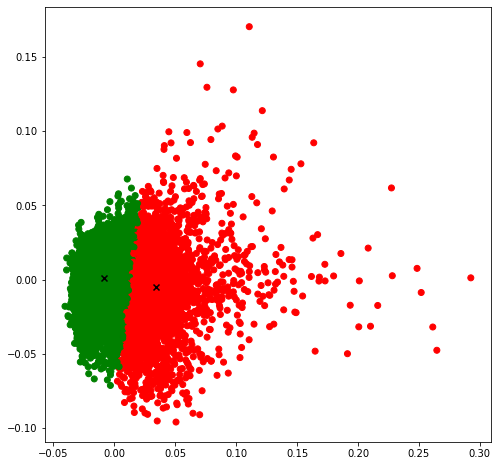

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
color = {0:"green",1:"red"}
colors = [color[x] for x in labels]
plt.figure(figsize=(8,8))
plt.scatter(df['First Component'],df['Second Component'],color=colors)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker="x", c='black');

In [21]:
# to find some insight, pick 10 words in each cluster which are closest to the centroids

X_dist = kmeans.transform(feature)
dist_to_centroids=pd.DataFrame(X_dist,columns=['toFirstcentroid','tosecondcentroid'])
dist_to_centroids["word"] = words
dist_to_centroids['labels'] =labels
dist_to_centroids

,toFirstcentroid,tosecondcentroid,word,labels
0,0.016838,0.057332,Agilent_AFM,0
1,0.006903,0.036141,Homebuyers_Tax,0
2,0.011586,0.031806,Next_Generation_Networks_NGNs,0
3,0.051383,0.041114,Plastic_Bottles,1
4,0.007334,0.044568,Scary_Scary,0
...,...,...,...,...
19995,0.020579,0.036935,bubble_gum_pop,0
19996,0.017194,0.025760,Sun_NASDAQ_JAVA,0
19997,0.009262,0.051545,shivs,0
19998,0.018333,0.060979,Outokumpu_NASDAQ_OUT1V.HE,0


In [22]:
cluster_1=dist_to_centroids[dist_to_centroids['labels']==0].sort_values(by='toFirstcentroid')
print('Top 10 words which are the closest to centroid of cluster 1')
print(cluster_1['word'][0:10])

print('==========================')


print('Top 10 words which are the closest to centroid of cluster 2')
cluster_2=dist_to_centroids[dist_to_centroids['labels']==1].sort_values(by='tosecondcentroid')
print(cluster_2['word'][0:10])

Top 10 words which are the closest to centroid of cluster 1
13181     Soulful_Symphony
10229            Sita_Devi
19957          Cadaver_dog
11099    By_Afkar_Abdullah
5441         Biggers_Reyno
11258     Iceland_Keflavik
5885       Hampton_Phoebus
2343       Wrestlemania_XV
14759          Boqueron_SA
13012        Tip_Off_Timer
Name: word, dtype: object
Top 10 words which are the closest to centroid of cluster 2
882            nonaffiliated_emergency
10077                     Sarah_Gopaul
16745                  Dash_Navigation
19211                   Noto_peninsula
7891       choppers_squadron_commander
13761                      ladyfingers
19722            domoic_acid_poisoning
19393                  Chesney_Paisley
17930    called_countrypolitan_mixture
17573                    Tuya_Marriage
Name: word, dtype: object


So each word group contains the words close to the centroids and thus they should be some representative words of each cluster....however, it is difficult to draw insight because each cluster is not well defined....
If I can say something, the words in cluster 1 are more likely to something to do with human or animals or areas name such as dog, name of the journalist, a person name and a name of god. Biggers_Reyno, Iceland_Keflavik, and   Boqueron_SA is area's name.
Cluster 2 is more like the name of things or actions, something not related to living things. For example, nonaffiliated_emergency, Dash_Navigation or  domoic_acid_poisoning.
That being said, cluster 2 has a bucnh of people's names. so again, this is not well-defined clusters

In [23]:
# Plat with the model
#y1 - x1 + x2
def wordcombination(y1, x1, x2):
    word = model.most_similar(positive=[y1, x2], negative=[x1])
    return word[0][0]

In [24]:
wordcombination('beer', 'America', 'Japan')

'Shochu'

In [25]:
wordcombination('America', 'Germany', 'Spain')

'Latin_America'